<a href="https://colab.research.google.com/github/hyojin13/data_analysis/blob/main/student_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

t-test result: t-statistic = 0.6778832123265865, p-value = 0.4994431318589554
Fail to reject null hypothesis. There is no significant difference in sleep quality based on social media usage time.


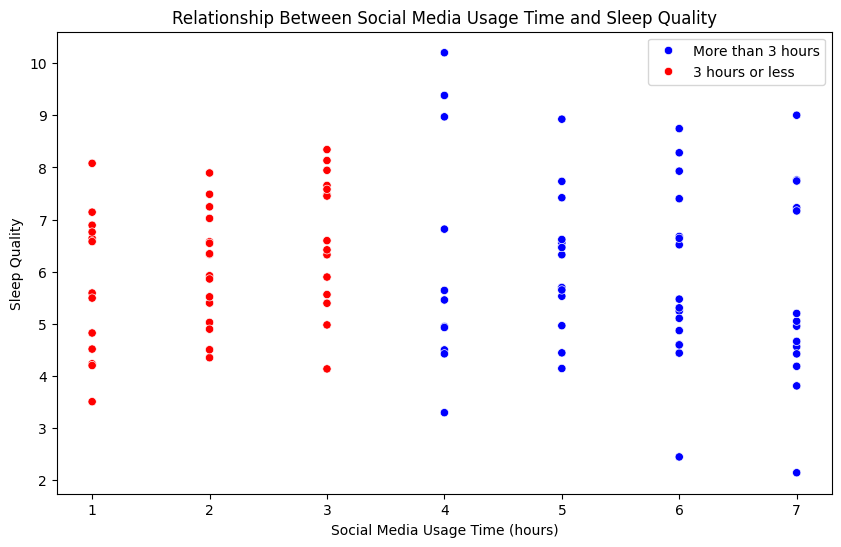

In [1]:
#1
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

data = {"ID": range(1, 101), "Social_Media_Hours": np.random.randint(1, 8, 100), "Sleep_Quality": np.random.normal(6, 1.5, 100)}
df = pd.DataFrame(data)
df['Usage_Group'] = np.where(df['Social_Media_Hours'] > 3, 'More than 3 hours', '3 hours or less')
df.to_csv("social_media_sleep_quality.csv", index=False)

df = pd.read_csv("social_media_sleep_quality.csv")
group1 = df[df['Usage_Group'] == '3 hours or less']['Sleep_Quality']
group2 = df[df['Usage_Group'] == 'More than 3 hours']['Sleep_Quality']

t_stat, p_value = ttest_ind(group1, group2)
print(f"t-test result: t-statistic = {t_stat}, p-value = {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference in sleep quality based on social media usage time.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in sleep quality based on social media usage time.")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social_Media_Hours', y='Sleep_Quality', hue='Usage_Group', data=df, palette=['blue', 'red'])

plt.title('Relationship Between Social Media Usage Time and Sleep Quality')
plt.xlabel('Social Media Usage Time (hours)')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()